<a href="https://colab.research.google.com/github/06Cata/Kaggle_Wine_Quality/blob/main/Kaggle_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 一、瞭解資料內容 Checking data content

In [3]:
# 環境準備，使用 Python NumPy、Pandas, Matplolib、Plotly
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [5]:
# 資料來源 Data source

url = 'https://raw.githubusercontent.com/06Cata/Kaggle_Wine_Quality/main/raw_data/WineQT.csv'
df_wine = pd.read_csv(url)

df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [6]:
# 讀取資料、查看基本訊息 Import data 、View basic information

df_wine.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
df_wine.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [8]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [9]:
# 檢查是否有重複資料

filtered_data = df_wine[df_wine.duplicated(keep=False)]

filtered_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id


In [10]:
# 以克/升（g/dm³）計量
# 'fixed acidity' : 固定酸度
# 'volatile acidity': 揮發性酸度，這些酸對於葡萄酒的味道有重要影響
# 'citric acid' : 檸檬酸，可以增加葡萄酒的新鮮感和酸度
# 'residual sugar': 殘留糖分
# 'chlorides': 氯化物，對葡萄酒的口感和味道有影響
# 'free sulfur dioxide': 游離二氧化硫，以毫克/升（mg/dm³）計量，防止葡萄酒氧化和細菌感染的重要添加劑
# 'total sulfur dioxide' : 總二氧化硫，以毫克/升（mg/dm³）計量，與游離二氧化硫密切相關
# 'density': 密度，以克/立方厘米（g/cm³）計量，用來估計葡萄酒的酒精含量
# 'pH': 酸性程度
# 'sulphates': 硫酸鹽，以克/升（g/dm³）計量，可以增加葡萄酒的防腐能力和抗氧化性
# 'alcohol': 酒精含量，以百分比計量，影響葡萄酒的口感和醉酒感
# 'quality': 品質評分，介於 0 到 10 之間的整數
# 'Id'

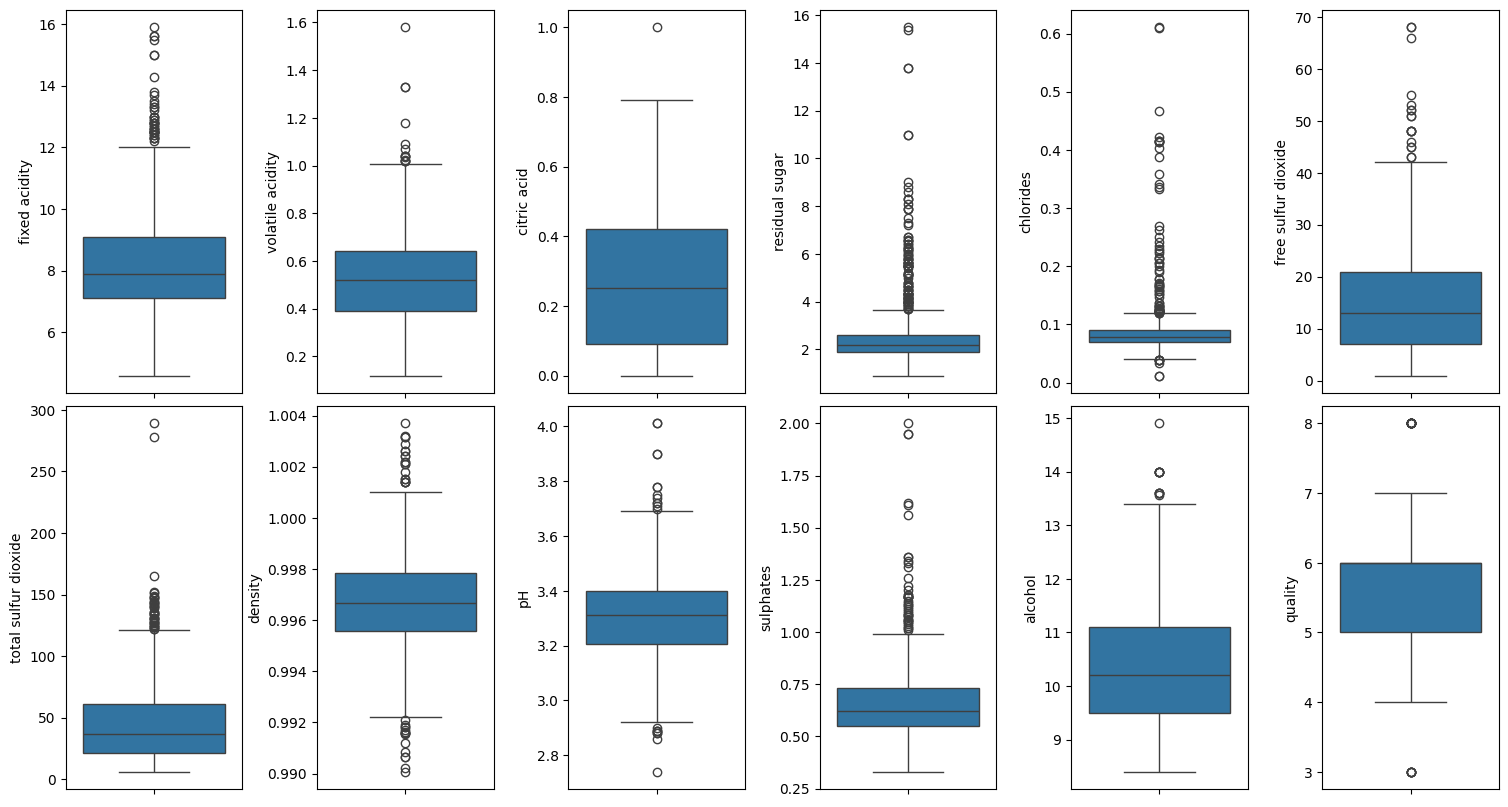

In [11]:
# 盒鬚圖，查看數值範圍

fig, ax = plt.subplots(2, 6, figsize=(15, 8))
ax = ax.flatten()

index = 0
for i in df_wine.columns:
  if(i != 'Id'):
    sb.boxplot(df_wine, y=i, ax=ax[index])
    index +=1

plt.tight_layout(pad=0.4)
plt.show()


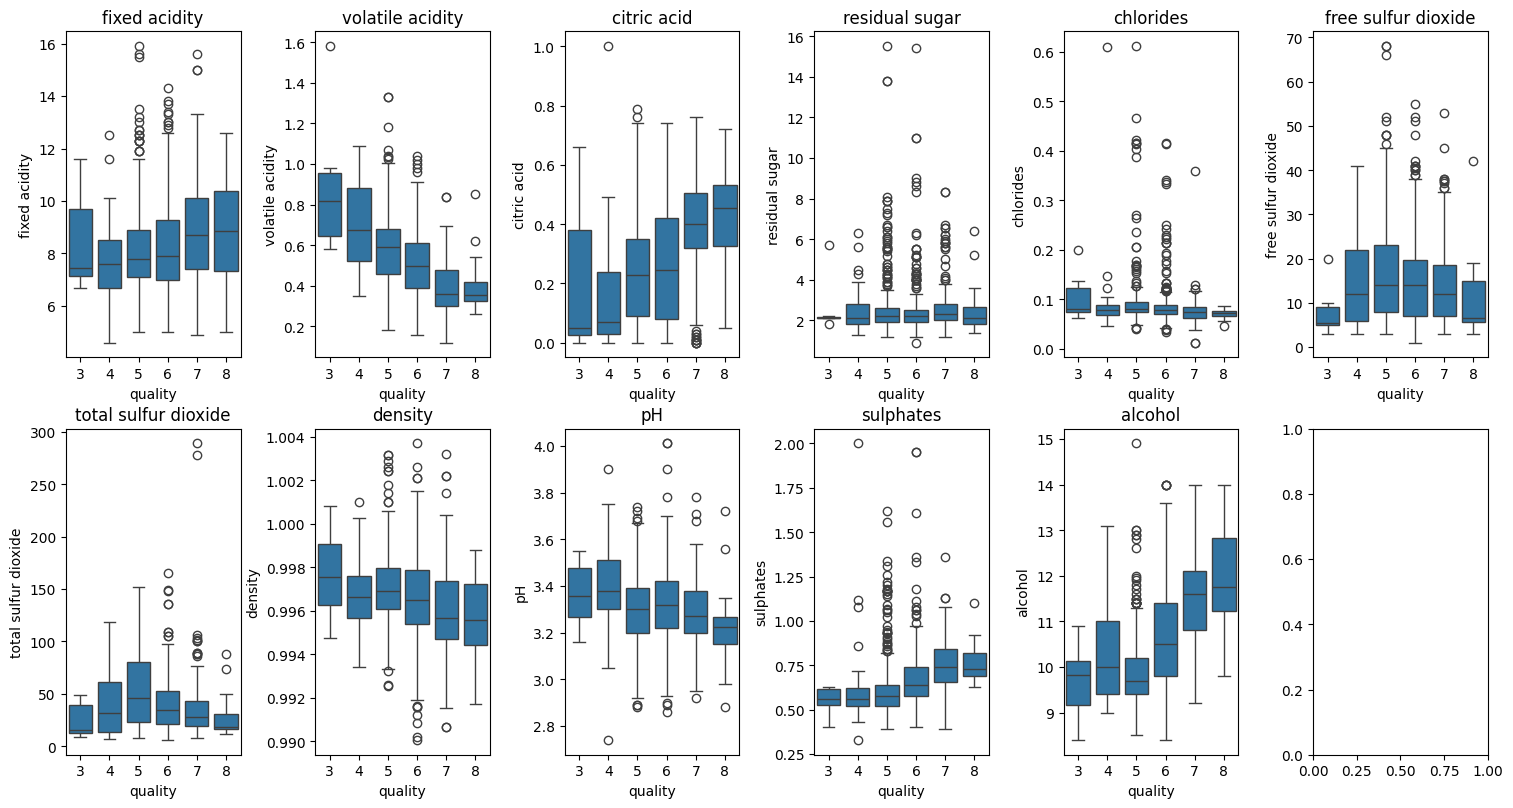

In [12]:
# 盒鬚圖，查看數值範圍

lst = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides',
       'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

fig, ax = plt.subplots(2, 6, figsize=(15,8))
ax = ax.flatten()

index = 0
for index, val in enumerate(lst):
    sb.boxplot(df_wine, x='quality', y=val, ax=ax[index])
    ax[index].set_title(val)
    index +=1

plt.tight_layout(pad=0.4)
plt.show()

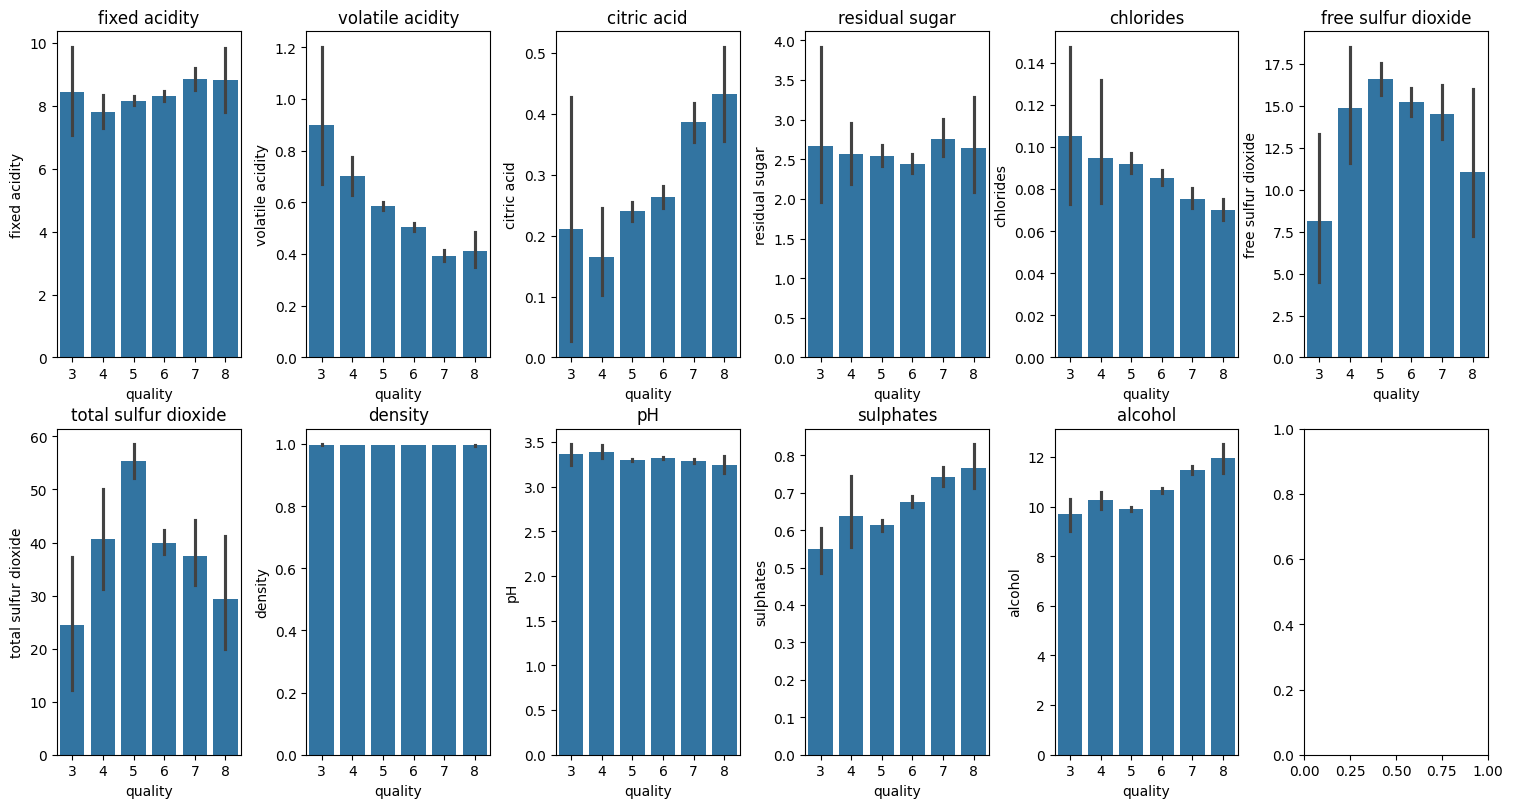

In [13]:
# 盒鬚圖，查看數值與quality關係

fig, ax = plt.subplots(2,6, figsize=(15, 8))
ax = ax.flatten()

index = 0
for i in df_wine.columns:
    if (i != 'quality') & (i != 'Id'):
        sb.barplot(df_wine, x='quality', y=i, ax=ax[index])
        ax[index].set_title(i)
        index += 1

plt.tight_layout(pad=0.4)
plt.show()

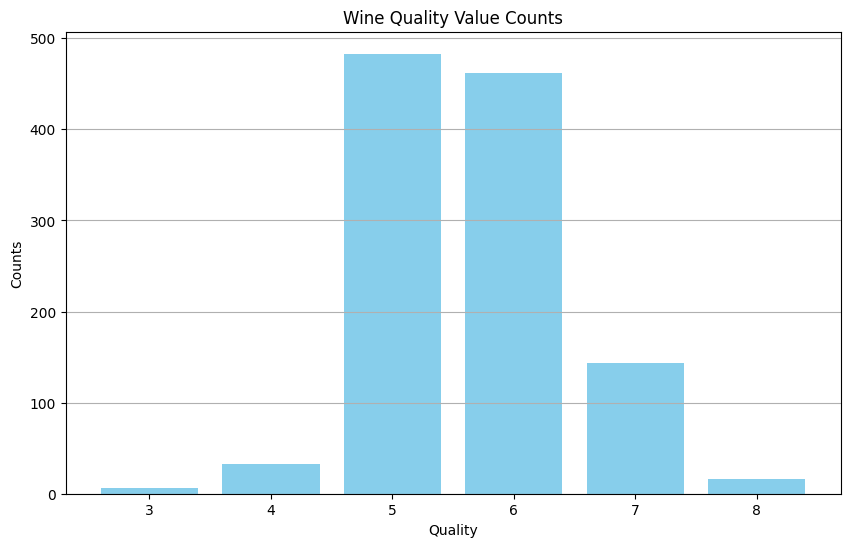

In [14]:
# 查看['quality']數值出現總量

quality_counts = df_wine['quality'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(quality_counts.index, quality_counts.values, color='skyblue')
plt.title('Wine Quality Value Counts')
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.grid(axis='y')
plt.show()

<Axes: xlabel='quality'>

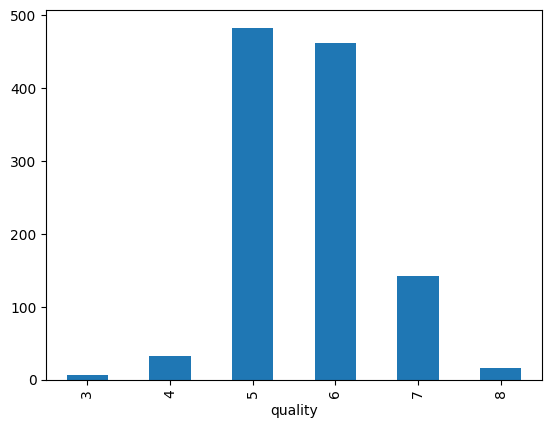

In [15]:
groups = df_wine.groupby(by="quality").size()
groups.plot.bar()

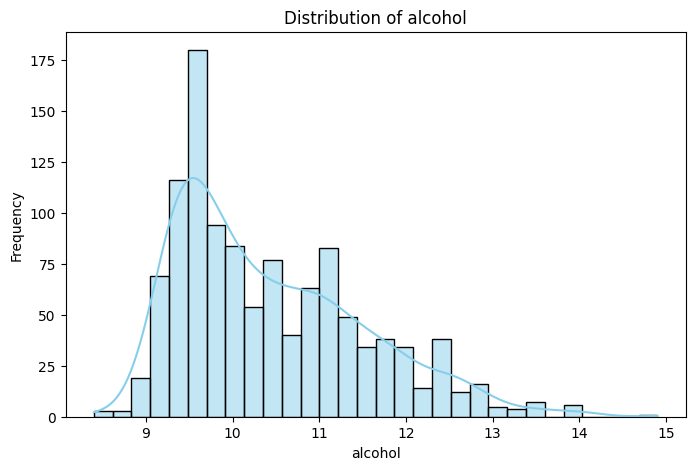

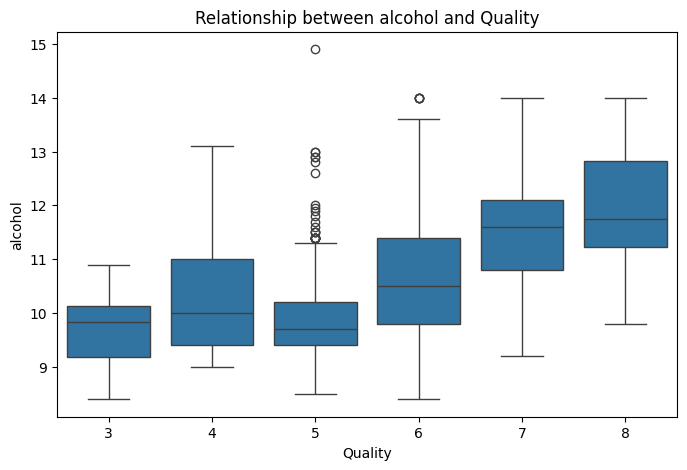

In [16]:
# numerical_columns = df_wine.columns[:-2]

numerical_columns = ['alcohol']


for column in numerical_columns:
    #
    plt.figure(figsize=(8, 5))
    sb.histplot(df_wine[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    #
    plt.figure(figsize=(8, 5))
    sb.boxplot(df_wine, x='quality', y=column)
    plt.title(f'Relationship between {column} and Quality')
    plt.xlabel('Quality')
    plt.ylabel(column)
    plt.show()


# 二、資料清理 Data cleaning

In [17]:
# 沒有缺漏，不用補

# 三、轉換資料型態 Converting data type

In [18]:
# 都是數值型，不需轉換

# 特徵工程

In [19]:
# 資料正規化_1
# 標準化，適合於數據呈高斯分佈的情況，標準化後的數據沒有固定範圍，主要取決於數據的原始分佈。對算法如支持向量機（SVM）和線性回歸效果較好

df_wine_standard = df_wine.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_columns = df_wine_standard.columns.difference(["quality"])
df_wine_standard[feature_columns] = scaler.fit_transform(df_wine_standard[feature_columns])

df_wine_standard

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,5,-1.735618
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,5,-1.733462
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,5,-1.731306
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,6,-1.729150
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,5,-1.726993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.151292,-0.118842,-0.703785,-0.171289,-0.231395,1.306316,-0.180503,-0.514707,0.695966,0.541862,0.515741,6,1.696940
1139,-0.865059,0.493785,-0.958109,-0.466421,-0.400719,1.208717,-0.241539,-0.114545,0.695966,0.952843,-0.870937,6,1.699096
1140,-1.208538,0.382399,-0.958109,-0.392638,0.064922,1.599113,-0.058432,-0.951246,0.887542,-0.456235,0.053515,5,1.701252
1141,-1.380278,0.103932,-0.856379,-0.245072,-0.527712,2.282306,0.155192,-0.836914,1.334554,0.600574,0.700632,6,1.703408


In [20]:
# 資料正規化_2
# 最小-最大正規化 適合於數據範圍固定且已知，固定為0到1（或自定義範圍）。對神經網絡和深度學習效果較好

df_wine_minmax = df_wine.copy()

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_wine_minmax[feature_columns] = min_max_scaler.fit_transform(df_wine_minmax[feature_columns])

df_wine_minmax

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,5,0.000000
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,5,0.000626
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,5,0.001252
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,6,0.001879
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,5,0.002505
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.150442,0.267123,0.13,0.095890,0.106845,0.417910,0.120141,0.416300,0.535433,0.251497,0.400000,6,0.996869
1139,0.194690,0.342466,0.08,0.068493,0.093489,0.402985,0.113074,0.472834,0.535433,0.293413,0.169231,6,0.997495
1140,0.141593,0.328767,0.08,0.075342,0.130217,0.462687,0.134276,0.354626,0.559055,0.149701,0.323077,5,0.998121
1141,0.115044,0.294521,0.10,0.089041,0.083472,0.567164,0.159011,0.370778,0.614173,0.257485,0.430769,6,0.998748


In [21]:
# quality二分為"good" and "bad"

bins = (0, 6.0, 10)
group_names = ['bad', 'good']
df_wine_standard['quality'] = pd.cut(df_wine_standard['quality'], bins = bins, labels = group_names)


bins = (0, 6.0, 10)
group_names = ['bad', 'good']
df_wine_minmax['quality'] = pd.cut(df_wine_minmax['quality'], bins = bins, labels = group_names)

In [22]:
# quality 轉為 LabelEncoder

from sklearn.preprocessing import LabelEncoder

label_quality = LabelEncoder()
df_wine_standard['quality'] = label_quality.fit_transform(df_wine_standard['quality'])

label_quality = LabelEncoder()
df_wine_minmax['quality'] = label_quality.fit_transform(df_wine_minmax['quality'])

In [23]:
df_wine_standard.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,0,-1.735618
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,0,-1.733462
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,0,-1.731306
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,0,-1.729150
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,0,-1.726993
5,-0.521580,0.716559,-1.365027,-0.540205,-0.252560,-0.255269,-0.180503,0.555854,1.270695,-0.573658,-0.963382,0,-1.724837
6,-0.235347,0.382399,-1.059838,-0.687771,-0.379553,-0.060071,0.399334,-0.171711,-0.070340,-1.160774,-0.963382,0,-1.722681
7,-0.578826,0.660865,-1.365027,-0.982903,-0.464216,-0.060071,-0.760341,-1.107153,0.504389,-1.102062,-0.408711,1,-1.720525
8,-0.292593,0.271012,-1.263297,-0.392638,-0.294891,-0.645665,-0.851895,0.036165,0.312813,-0.514946,-0.870937,1,-1.718369
9,-0.922305,0.271012,-0.958109,-0.540205,0.213081,-0.060071,0.582441,-0.431556,-0.198057,-0.691081,-1.148272,0,-1.714057


In [24]:
df_wine_minmax.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0,0.000000
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,0,0.000626
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,0,0.001252
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,0,0.001879
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0,0.002505
5,0.247788,0.369863,0.00,0.061644,0.105175,0.179104,0.120141,0.567548,0.606299,0.137725,0.153846,0,0.003131
6,0.292035,0.328767,0.06,0.047945,0.095159,0.208955,0.187279,0.464758,0.440945,0.077844,0.153846,0,0.003757
7,0.238938,0.363014,0.00,0.020548,0.088481,0.208955,0.053004,0.332599,0.511811,0.083832,0.246154,1,0.004383
8,0.283186,0.315068,0.02,0.075342,0.101836,0.119403,0.042403,0.494126,0.488189,0.143713,0.169231,1,0.005009
9,0.185841,0.315068,0.08,0.061644,0.141903,0.208955,0.208481,0.428047,0.425197,0.125749,0.123077,0,0.006262


# 五、分析 Analyzing

In [25]:
# df_encoded = df_wine.select_dtypes(include=[np.number])
# palette = sb.color_palette("husl", len(df_encoded['quality'].unique()))

# sb.pairplot(df_encoded, hue="quality", palette=palette)

In [26]:
# sb.pairplot(df_wine,
#              kind="reg",
#              diag_kind="kde",
#              hue="quality",
#              palette='mako')

# plt.show()

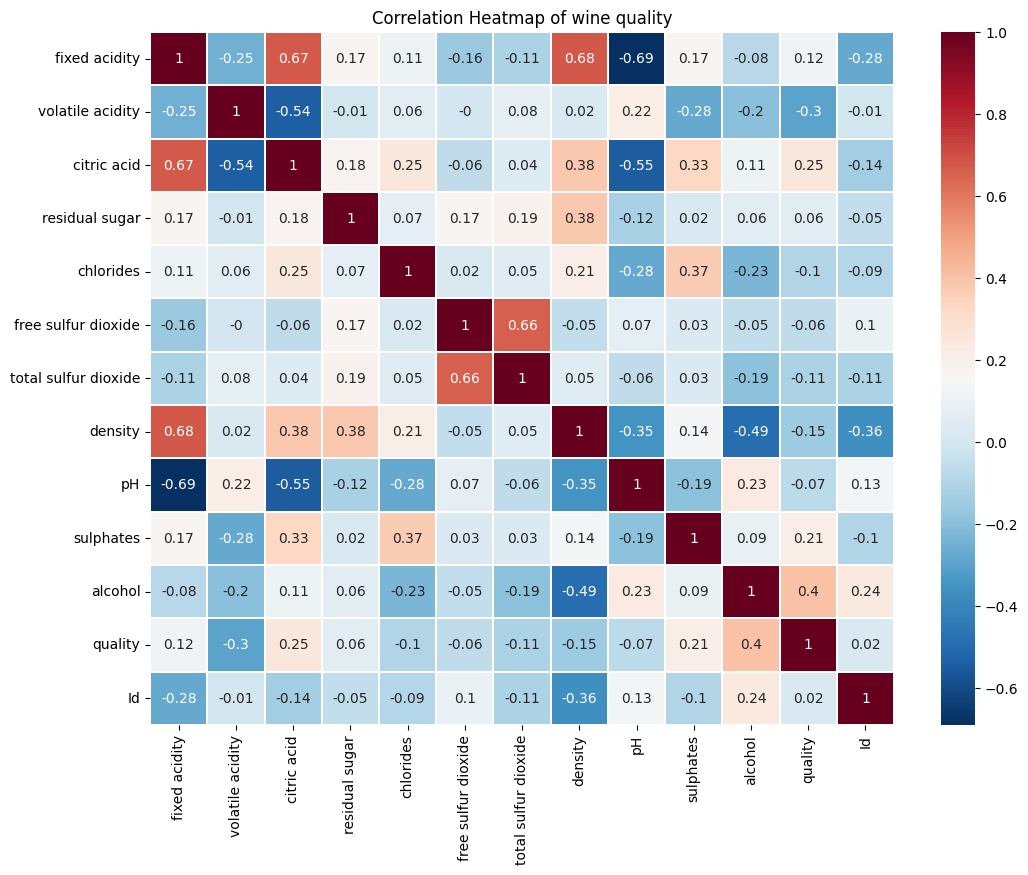

quality                 1.00
alcohol                 0.40
citric acid             0.25
sulphates               0.21
fixed acidity           0.12
residual sugar          0.06
Id                      0.02
free sulfur dioxide    -0.06
pH                     -0.07
chlorides              -0.10
total sulfur dioxide   -0.11
density                -0.15
volatile acidity       -0.30
Name: quality, dtype: float64


In [27]:
# 1
# df_wine_standard
# 相關係數矩陣

# fig, ax = plt.subplots(figsize = (16, 10))
# sb.heatmap(df_wine.corr(), annot=True, linewidth=0.2)
# plt.show()

df_encoded_standard = df_wine_standard.select_dtypes(include=[np.number])
correlation_matrix_standard = df_encoded_standard.corr().round(2)

plt.figure(figsize=(12,9))
sb.heatmap(correlation_matrix_standard,annot=True,cmap='RdBu_r',linewidths=0.2)
fig=plt.gcf()
plt.title("Correlation Heatmap of wine quality")
plt.show()

print(correlation_matrix_standard['quality'].sort_values(ascending=False))



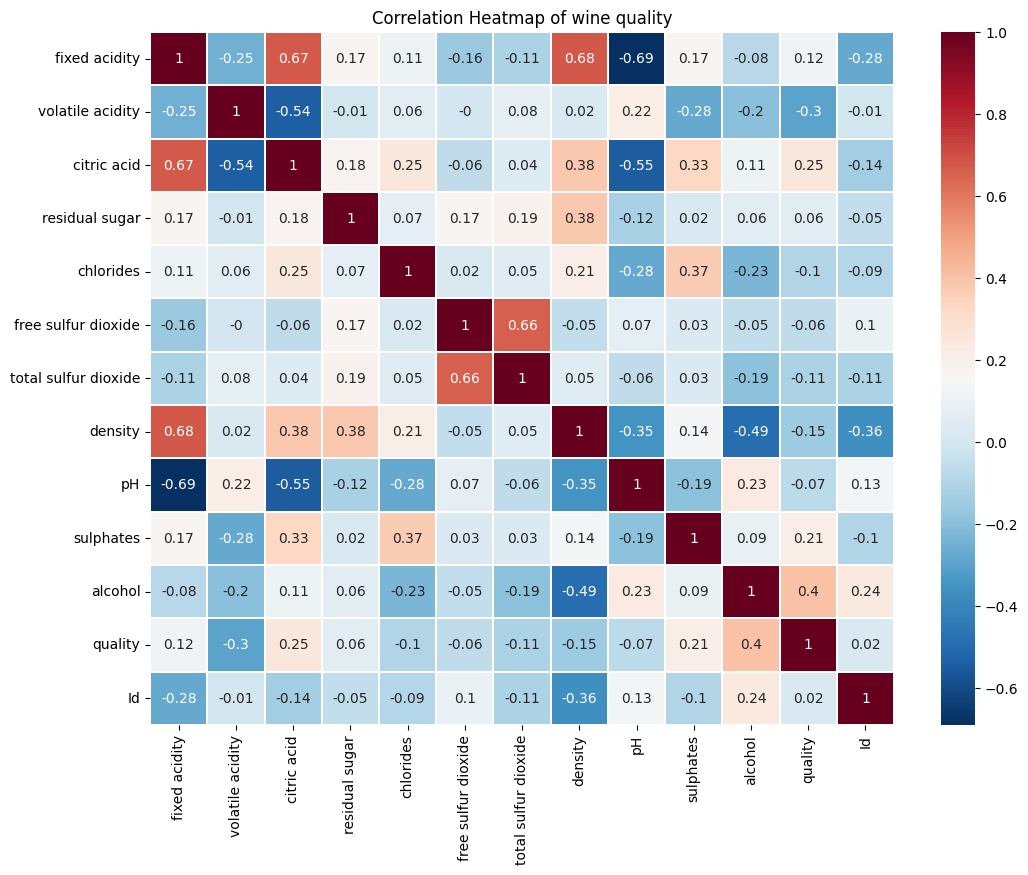

quality                 1.00
alcohol                 0.40
citric acid             0.25
sulphates               0.21
fixed acidity           0.12
residual sugar          0.06
Id                      0.02
free sulfur dioxide    -0.06
pH                     -0.07
chlorides              -0.10
total sulfur dioxide   -0.11
density                -0.15
volatile acidity       -0.30
Name: quality, dtype: float64


In [28]:
# 1
# df_wine_minmax
# 相關係數矩陣


df_encoded_minmax = df_wine_minmax.select_dtypes(include=[np.number])
correlation_matrix_minmax = df_encoded_minmax.corr().round(2)

plt.figure(figsize=(12,9))
sb.heatmap(correlation_matrix_minmax,annot=True,cmap='RdBu_r',linewidths=0.2)
fig=plt.gcf()
plt.title("Correlation Heatmap of wine quality")
plt.show()

print(correlation_matrix_minmax['quality'].sort_values(ascending=False))

In [29]:
# 品質提升，揮發性酸度(volatile acidity)下降
# 品質提升，檸檬酸(citric acid)含量增加
# 品質提升，氯化物('chlorides')略為下降
# 品質提升，硫酸鹽('sulphates')含量增加
# 品質提升，酒精('alcohol')含量增加

# 固定酸度(fixed acidity): 與密度(destiny) 0.68 和 檸檬酸(citric acid）0.67 有較高的相關性，與 pH值（pH）-0.69 有較高的負相關性
# 揮發性酸度(volatile acidity）: 與 品質(quality）-0.41的負相關性最高，與 檸檬酸（citric acid ）-0.54 有較高的負相關性
# 檸檬酸(citric acid）: 與 揮發性酸度(volatile acidity）-0.54 和 pH值（pH）-0.55 有較高的負相關性
# 殘留糖分(residual sugar）: 與 密度(density）0.38 有一定的正相關性，但相關性不高
# 氯化物(chlorides）: 與 硫酸鹽(sulphates）0.37 有一定的正相關性，但相關性不高
# 游離二氧化硫(free sulfur dioxide） 和 總二氧化硫(total sulfur dioxide）: 兩者之間相關性高 0.66，通常二者會共同影響葡萄酒的特性
# 密度(density）: 與 酒精度(alcohol）-0.49 有較高的負相關性，與 pH值（pH）-0.35 有一定的負相關性，但相關性不高
# 硫酸鹽 (sulphates）: 與 氯化物(chlorides）0.37 和 檸檬酸(citric acid）0.33 有一定的正相關性，但相關性不高。
# 酒精度(alcohol）: 與  品質(quality）0.48 有較高的正相關性

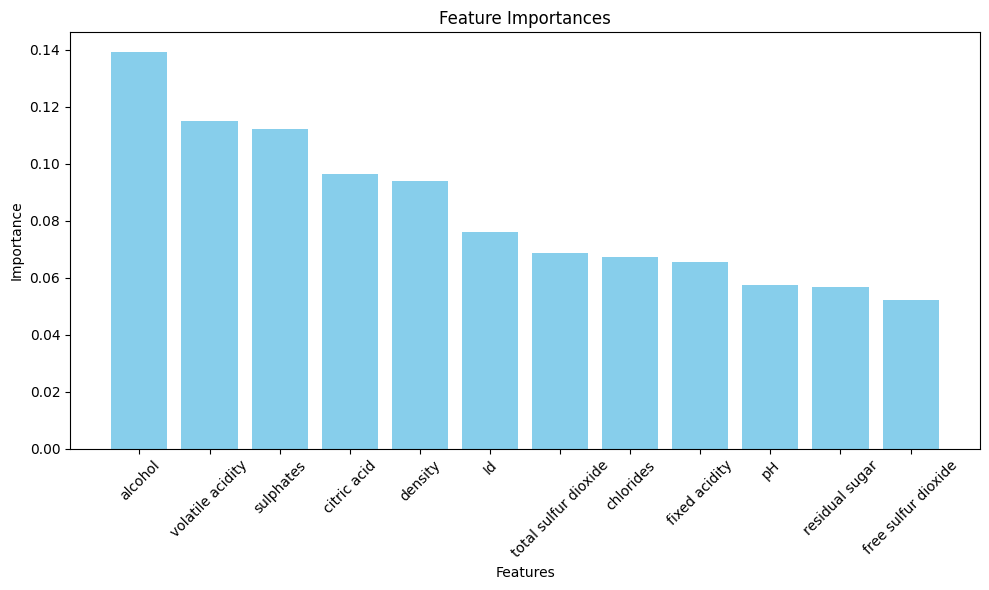

,Feature,Importance
10,alcohol,0.139126
1,volatile acidity,0.114807
9,sulphates,0.112207
2,citric acid,0.096320
7,density,0.093956
11,Id,0.076188
6,total sulfur dioxide,0.068608
4,chlorides,0.067203
0,fixed acidity,0.065379
8,pH,0.057308


In [30]:
# 1
# df_wine_standard
# 特徵重要性

from sklearn.ensemble import RandomForestClassifier

X = df_encoded_standard.drop(['quality'], axis=1)
y = df_encoded_standard['quality']

model = RandomForestClassifier()

model.fit(X, y)

# 特徵重要性
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances')
ax.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

feature_importance_df

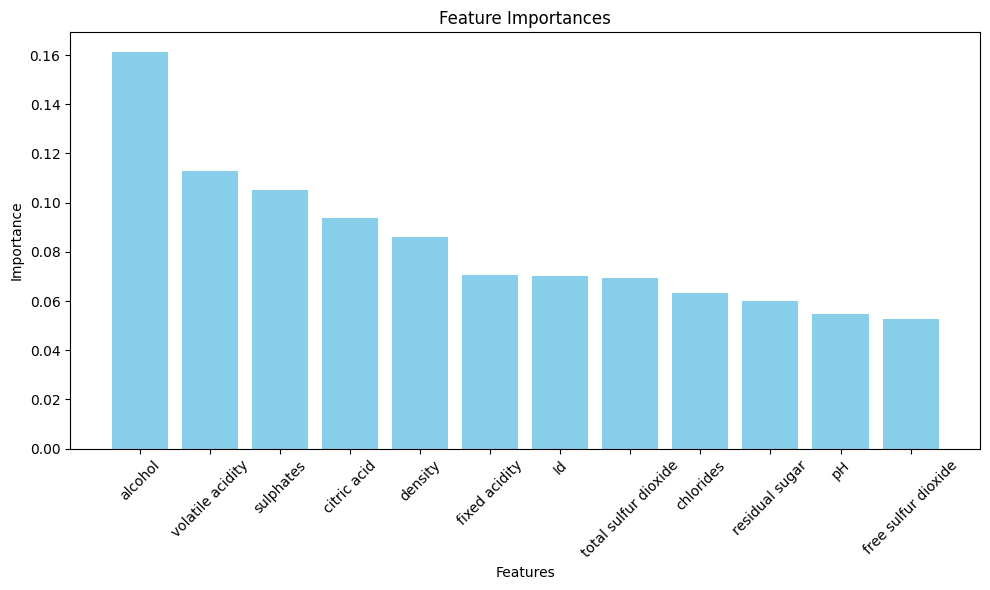

,Feature,Importance
10,alcohol,0.161175
1,volatile acidity,0.112969
9,sulphates,0.105212
2,citric acid,0.093566
7,density,0.085940
0,fixed acidity,0.070762
11,Id,0.070037
6,total sulfur dioxide,0.069410
4,chlorides,0.063435
3,residual sugar,0.059839


In [31]:
# 1
# df_wine_minmax
# 特徵重要性

from sklearn.ensemble import RandomForestClassifier

X = df_encoded_minmax.drop(['quality'], axis=1)
y = df_encoded_minmax['quality']

model = RandomForestClassifier()

model.fit(X, y)

# 特徵重要性
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances')
ax.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

feature_importance_df

# Baseline、ML

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [33]:
# 查看準確度
# df_wine_standard

X = df_wine_standard.drop('quality', axis = 1)
y = df_wine_standard['quality']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic_Regression
log = LogisticRegression(random_state=0, max_iter=3000)
scores_log = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_log)

# Decision_Tree
decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_decision_tree)

# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators=100)
scores_rfc = cross_val_score(rfc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_rfc)

# Support_Vector_Machines
svc = SVC()
scores_svc = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_svc)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_knn)

# Gaussian_Naive_Baye
gaussian = GaussianNB()
scores_gaussian = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gaussian)

# Gradient_Boosting_Classifier
Gradient = GradientBoostingClassifier()
scores_gradient = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gradient)


0.8752236834204048
0.8544706659460758
0.8938389479373086
0.8817990752416982
0.8456854620789047
0.8390800456374226
0.8390800456374226


In [34]:
# 查看準確度
# df_wine_minmax

X = df_wine_minmax.drop('quality', axis = 1)
y = df_wine_minmax['quality']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic_Regression
log = LogisticRegression(random_state=0, max_iter=3000)
scores_log_minmax = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_log_minmax)

# Decision_Tree
decision_tree = DecisionTreeClassifier()
scores_decision_tree_minmax = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_decision_tree_minmax)

# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators=100)
scores_rfc_minmax = cross_val_score(rfc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_rfc_minmax)

# Support_Vector_Machines
svc = SVC()
scores_svc_minmax = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_svc_minmax)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn_minmax = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_knn_minmax)

# Gaussian_Naive_Baye
gaussian = GaussianNB()
scores_gaussian_minmax = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gaussian_minmax)

# Gradient_Boosting_Classifier
Gradient = GradientBoostingClassifier()
scores_gradient_minmax = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gradient_minmax)


0.8621329490181948
0.8479132888968955
0.9025881222602535
0.8599411517444304
0.8522188194319342
0.8390800456374226
0.8390800456374226


In [35]:
# models = pd.DataFrame({
#     'Model': ['Logistic_Regression',
#           'Decision_Tree',
#           'Random_Forest_Classifier',
#           'Support_Vector_Machines',
#           'KNN',
#           'Gaussian_Naive_Baye',
#           'Gradient_Boosting_Classifier'],
#     'Score': [scores_log,
#           scores_decision_tree,
#           scores_rfc,
#           scores_svc,
#           scores_knn,
#           scores_gaussian,
#           scores_gradient]
#     })

# models

# 模型

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV


In [37]:
# df_wine_standard
# Random_Forest_Classifier

X = df_wine_standard.drop('quality', axis = 1)
y = df_wine_standard['quality']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.1, random_state = 43, stratify=train_y)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(train_X, train_y)

y_pred = rfc.predict(test_X)

report = classification_report(test_y, y_pred)
print(report)

accuracy = accuracy_score(test_y, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       201
           1       0.70      0.50      0.58        28

    accuracy                           0.91       229
   macro avg       0.82      0.74      0.77       229
weighted avg       0.90      0.91      0.91       229

Random Forest Classifier Accuracy: 0.9126637554585153


In [38]:
# df_wine_standard
# logistic regression

log = LogisticRegression(random_state=0, max_iter=3000)
log.fit(train_X, train_y.values.ravel())

y_pred = log.predict(test_X)

report = classification_report(test_y, y_pred)
print(report)

accuracy = accuracy_score(test_y, y_pred)
print("Logistic Regression Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       201
           1       0.60      0.54      0.57        28

    accuracy                           0.90       229
   macro avg       0.77      0.74      0.75       229
weighted avg       0.90      0.90      0.90       229

Logistic Regression Accuracy: 0.8995633187772926


In [39]:
# df_wine_minmax
# Random_Forest_Classifier
# 使用這個

X = df_wine_minmax.drop('quality', axis = 1)
y = df_wine_minmax['quality']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.1, random_state = 43, stratify=train_y)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(train_X, train_y)

y_pred = rfc.predict(test_X)

report = classification_report(test_y, y_pred)
print(report)

accuracy = accuracy_score(test_y, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       201
           1       0.70      0.50      0.58        28

    accuracy                           0.91       229
   macro avg       0.82      0.74      0.77       229
weighted avg       0.90      0.91      0.91       229

Random Forest Classifier Accuracy: 0.9126637554585153


In [40]:
# df_wine_minmax
# logistic regression

log = LogisticRegression(random_state=0, max_iter=3000)
log.fit(train_X, train_y.values.ravel())

y_pred = log.predict(test_X)

report = classification_report(test_y, y_pred)
print(report)

accuracy = accuracy_score(test_y, y_pred)
print("Logistic Regression Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       201
           1       0.55      0.21      0.31        28

    accuracy                           0.88       229
   macro avg       0.72      0.59      0.62       229
weighted avg       0.86      0.88      0.86       229

Logistic Regression Accuracy: 0.8820960698689956


In [40]:
# 查看，假設減少重要性 < 0.07 的特徵，準確率是否比沒減少來的好

features_to_drop = ['Id','free sulfur dioxide', 'residual sugar', 'fixed acidity', 'chlorides', 'pH']

X_reduced = X.drop(features_to_drop, axis=1)

train_X_reduced, test_X_reduced, train_y, test_y = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
train_X_reduced, val_X, train_y, val_y = train_test_split(train_X_reduced, train_y, test_size = 0.1, random_state = 43, stratify=train_y)


rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(train_X_reduced, train_y)

y_pred = rfc.predict(test_X_reduced)

report = classification_report(test_y, y_pred)
print(report)

accuracy = accuracy_score(test_y, y_pred)
print("Random Forest Classifier Accuracy with Reduced Features:", accuracy)


# 準確率有變高，後面我選擇減少這些重要性低的特徵

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       201
           1       0.68      0.61      0.64        28

    accuracy                           0.92       229
   macro avg       0.81      0.78      0.80       229
weighted avg       0.91      0.92      0.91       229

Random Forest Classifier Accuracy with Reduced Features: 0.9170305676855895


In [41]:
# 準確率 (Accuracy):
# 原本: 0.9301
# 減少特徵後: 0.9301
# 準確率相同

# 精確率 (Precision):
# 類別 0: 原本 (0.95), 減少特徵後 (0.96)
# 類別 1: 原本 (0.77), 減少特徵後 (0.73)
# 類別 0 的精確率稍微提高，類別 1 的精確率稍微下降

# 召回率 (Recall):
# 類別 0: 原本 (0.98), 減少特徵後 (0.97)
# 類別 1: 原本 (0.61), 減少特徵後 (0.68)
# 類別 0 的召回率稍微下降，類別 1 的召回率有所提高

# F1-score:
# 類別 0: 原本 (0.96), 減少特徵後 (0.96)
# 類別 1: 原本 (0.68), 減少特徵後 (0.70)
# 類別 0 的召回率相等，類別 1 的 F1-score 有所提高

# Macro avg:
# 原本: precision (0.86), recall (0.79), f1-score (0.82)
# 減少特徵後: precision (0.84), recall (0.82), f1-score (0.83)
# 減少特徵後的宏平均 (macro avg) 表現略有改善

# Weighted avg:
# 原本: precision (0.93), recall (0.93), f1-score (0.93)
# 減少特徵後: precision (0.93), recall (0.93), f1-score (0.93)
# 加權平均 (weighted avg) 的表現相同

# 精確率與召回率：減少特徵後，類別 1 的召回率有所提高，這意味著模型能夠檢測到更多的類別 1 樣本，儘管精確率略有下降

# F1-score 提高：減少特徵後，類別 1 的 F1-score 略有改善，這表明該模型在類別 1 上的整體平衡性能有所提高

# 宏平均 (macro avg)：減少特徵後的宏平均指標略有改善，表明模型在兩個類別上的表現更加均衡

# 有比較好，因此下面選擇「減少特徵」

In [41]:
# 處理不平衡['quality']
# upsampling、downsampling

# 隨機 SMOTE上採樣


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

X = df_wine_minmax.drop(['quality','Id','free sulfur dioxide', 'residual sugar', 'fixed acidity', 'chlorides', 'pH'], axis=1)
y = df_wine_minmax['quality']


#
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())
print()

#
train_X, test_X, train_y, test_y = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.1, random_state = 43, stratify=train_y)

rfc_smote = RandomForestClassifier(n_estimators=100, random_state=42)

rfc_smote.fit(train_X, train_y)

y_pred_smote = rfc_smote.predict(test_X)

#
X_test_with_predictions = test_X.copy()
X_test_with_predictions['quality'] = test_y.values  # 添加原始的 quality 欄位
X_test_with_predictions['quality_pred'] = y_pred_smote  # 添加預測的 quality 欄位

#
report_smote = classification_report(test_y, y_pred_smote)
accuracy_smote = accuracy_score(test_y, y_pred_smote)

print("SMOTE 上採樣後的隨機森林分類器分類報告:")
print(report_smote)
print()
print("SMOTE 上採樣後的隨機森林分類器準確度:", accuracy_smote)

quality
0    984
1    984
Name: count, dtype: int64

SMOTE 上採樣後的隨機森林分類器分類報告:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       203
           1       0.94      0.97      0.95       191

    accuracy                           0.95       394
   macro avg       0.95      0.95      0.95       394
weighted avg       0.95      0.95      0.95       394


SMOTE 上採樣後的隨機森林分類器準確度: 0.9543147208121827


In [42]:
# 使用隨機 SMOTE下採樣

undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)
print(pd.Series(y_resampled).value_counts())
print()

train_X, test_X, train_y, test_y = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.1, random_state = 43, stratify=train_y)

rfc_undersample = RandomForestClassifier(n_estimators=100, random_state=42)

rfc_undersample.fit(train_X, train_y)

y_pred_undersample = rfc_undersample.predict(test_X)

#
report_undersample = classification_report(test_y, y_pred_undersample)
accuracy_undersample = accuracy_score(test_y, y_pred_undersample)

print("下採樣後的隨機森林分類器分類報告:")
print(report_undersample)
print()
print("下採樣後的隨機森林分類器準確度:", accuracy_undersample)


quality
0    159
1    159
Name: count, dtype: int64

下採樣後的隨機森林分類器分類報告:
              precision    recall  f1-score   support

           0       0.71      0.88      0.78        33
           1       0.83      0.61      0.70        31

    accuracy                           0.75        64
   macro avg       0.77      0.75      0.74        64
weighted avg       0.76      0.75      0.74        64


下採樣後的隨機森林分類器準確度: 0.75


Train Loss: 0.0992
Test Loss: 0.1264


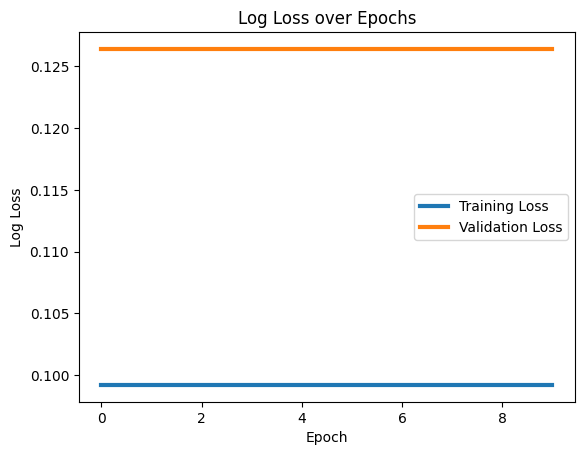

In [43]:
# 損失率
# 上採樣

from sklearn.metrics import log_loss

# 計算訓練集和測試集的預測概率
train_proba = rfc_smote.predict_proba(train_X)
test_proba = rfc_smote.predict_proba(test_X)

train_loss = log_loss(train_y, train_proba)
test_loss = log_loss(test_y, test_proba)


loss_list = [train_loss] * 10
test_loss_list = [test_loss] * 10    # 模擬多個 epoch 的損失率   # 這裡用相同的損失值來模擬

print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

#
plt.plot(loss_list, label="Training Loss", linewidth=3)
plt.plot(test_loss_list, label="Validation Loss", linewidth=3)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Log Loss over Epochs")
plt.show()

In [44]:
# 優化模型

rfc = RandomForestClassifier(random_state=42)

Parameters = {
  'max_depth' : [5, 10, 20],
  'n_estimators': [10, 50, 100, 150],
}

cv = RandomizedSearchCV(rfc, Parameters, cv=5)

cv.fit(train_X, train_y)


# 查看最佳參數
print("Best parameters found: ", cv.best_params_)

# 查看最佳模型的分數
print("Best score found: ", cv.best_score_)

#
results = pd.DataFrame(cv.cv_results_)
results.head(3)

Best parameters found:  {'n_estimators': 100, 'max_depth': 10}
Best score found:  0.8372946859903381


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.368499,0.011072,0.020192,0.004078,150,20,"{'n_estimators': 150, 'max_depth': 20}",0.869565,0.891304,0.826087,0.800000,0.777778,0.832947,0.042244,2
1,0.236151,0.029509,0.013429,0.002637,100,5,"{'n_estimators': 100, 'max_depth': 5}",0.804348,0.869565,0.782609,0.777778,0.800000,0.806860,0.032922,9
2,0.079854,0.006509,0.005979,0.000705,50,20,"{'n_estimators': 50, 'max_depth': 20}",0.891304,0.913043,0.782609,0.777778,0.777778,0.828502,0.060570,5


In [45]:
# 最佳參數已經找到 (n_estimators: 100, max_depth: 20)，使用這些最佳參數來訓練一個新的隨機森林分類器

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

X = df_wine_minmax.drop(['quality','Id','free sulfur dioxide', 'residual sugar', 'fixed acidity', 'chlorides', 'pH'], axis=1)
y = df_wine_minmax['quality']


#
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())
print()

#
train_X, test_X, train_y, test_y = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.1, random_state = 43, stratify=train_y)

best_rfc = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)

best_rfc.fit(train_X, train_y)

y_pred_best = best_rfc.predict(test_X)

# 加回去新欄位
X_test_with_predictions = test_X.copy()
X_test_with_predictions['quality'] = test_y.values  # 添加原始的 quality 欄位
X_test_with_predictions['quality_pred_best'] = y_pred_best  # 添加預測的 quality 欄位

#
report_smote_best = classification_report(test_y, y_pred_best)
accuracy_smote_best = accuracy_score(test_y, y_pred_best)

print("優化後，SMOTE 上採樣後的隨機森林分類器分類報告:")
print(report_smote_best)
print()
print("優化後，SMOTE 上採樣後的隨機森林分類器準確度:", accuracy_smote_best)

quality
0    984
1    984
Name: count, dtype: int64

優化後，SMOTE 上採樣後的隨機森林分類器分類報告:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       203
           1       0.94      0.97      0.95       191

    accuracy                           0.95       394
   macro avg       0.95      0.95      0.95       394
weighted avg       0.95      0.95      0.95       394


優化後，SMOTE 上採樣後的隨機森林分類器準確度: 0.9543147208121827


# 試著用Pytorch探索神經網絡

In [46]:
import torch

# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, 64)
        self.hidden2 = torch.nn.Linear(64, 32)
        self.predict = torch.nn.Linear(32, output_size)

    def forward(self, x):
        output1 = torch.relu(self.hidden1(x))
        output2 = torch.relu(self.hidden2(output1))
        output = torch.sigmoid(self.predict(output2))
        return output


In [47]:
# 模型、優化器初始化
model = Model(test_X.shape[1], 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.BCELoss()


# 資料格式轉換為 torch 張量
train_X_data = torch.tensor(train_X.values, dtype=torch.float32)
train_y_data = torch.tensor(np.expand_dims(train_y, axis=1), dtype=torch.float32)

val_X_data = torch.tensor(val_X.values, dtype=torch.float32)
val_y_data = torch.tensor(np.expand_dims(val_y, axis=1), dtype=torch.float32)

test_X_data  = torch.tensor(test_X.values, dtype=torch.float32)
test_y_data  = torch.tensor(np.expand_dims(test_y, axis=1), dtype=torch.float32)



In [48]:
# 訓練模型
batch_size = 32
num_epochs = 200

training_losses = []
val_losses = []

for epoch in range(num_epochs):
    for i in range(0, len(train_X_data), batch_size):
        prediction = model(train_X_data[i:i+batch_size])
        loss = loss_func(prediction, train_y_data[i:i+batch_size])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss = loss_func(model(train_X_data), train_y_data)
    training_losses.append(float(loss))

    y_pred = model(val_X_data)
    val_loss = loss_func(y_pred, val_y_data)
    print("training loss:{}, val loss:{}, val acc:{}".format(float(loss), val_loss, accuracy_score(val_y_data, np.where(y_pred >= 0.5, 1, 0))))

    val_losses.append(float(val_loss))

# 評估模型在測試集上的表現
model.eval()
with torch.no_grad():
    test_prediction = model(test_X_data)
    test_prediction = test_prediction.round()  # 將預測值四捨五入為0或1
    accuracy = (test_prediction.eq(test_y_data).sum().float() / test_y_data.shape[0]).item()
    print(f'Test Accuracy: {accuracy:.4f}')

training loss:0.6814831495285034, val loss:0.6817694902420044, val acc:0.6835443037974683
training loss:0.6680731177330017, val loss:0.6683198809623718, val acc:0.740506329113924
training loss:0.6496375799179077, val loss:0.6501404047012329, val acc:0.7341772151898734
training loss:0.6238517165184021, val loss:0.624941885471344, val acc:0.7531645569620253
training loss:0.5899669528007507, val loss:0.592185914516449, val acc:0.7658227848101266
training loss:0.5524149537086487, val loss:0.5566391944885254, val acc:0.7848101265822784
training loss:0.5186722874641418, val loss:0.5255197882652283, val acc:0.7784810126582279
training loss:0.4946404993534088, val loss:0.5043509602546692, val acc:0.7784810126582279
training loss:0.4805099070072174, val loss:0.49284952878952026, val acc:0.7911392405063291
training loss:0.47299492359161377, val loss:0.4872964918613434, val acc:0.7974683544303798
training loss:0.4693930149078369, val loss:0.48514479398727417, val acc:0.8037974683544303
training l

In [49]:
import numpy as np
from sklearn.metrics import classification_report

# 使用模型進行預測
with torch.no_grad():
    y_pred = model(test_X_data)
    y_pred = np.where(y_pred >= 0.5, 1, 0)  # 將預測結果轉換為 0 或 1

#
print(classification_report(test_y_data, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       203
         1.0       0.83      0.74      0.78       191

    accuracy                           0.80       394
   macro avg       0.80      0.80      0.80       394
weighted avg       0.80      0.80      0.80       394



In [50]:
X_test_with_predictions_pytorch = test_X.copy()
X_test_with_predictions_pytorch['quality'] = test_y.values  # 添加原始的 quality 欄位
X_test_with_predictions_pytorch['quality_pred_pytorch'] = y_pred  # 添加預測的 quality 欄位
X_test_with_predictions_pytorch

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality,quality_pred_pytorch
857,0.363014,0.020000,0.031802,0.360499,0.173653,0.307692,0,0
1480,0.138693,0.710631,0.081824,0.643945,0.275647,0.239408,1,1
56,0.260274,0.470000,0.236749,0.508811,0.143713,0.107692,0,0
1100,0.171233,0.430000,0.045936,0.398678,0.287425,0.430769,1,1
859,0.143836,0.460000,0.010601,0.455947,0.089820,0.307692,0,0
...,...,...,...,...,...,...,...,...
1401,0.162059,0.321358,0.013543,0.204228,0.133362,0.673790,1,1
1234,0.128274,0.362817,0.031871,0.465044,0.448985,0.277223,1,1
332,0.136986,0.650000,0.144876,0.699706,0.167665,0.338462,0,0
1334,0.091159,0.470000,0.063604,0.557334,0.333478,0.382376,1,1


Text(0, 0.5, 'BCE Loss')

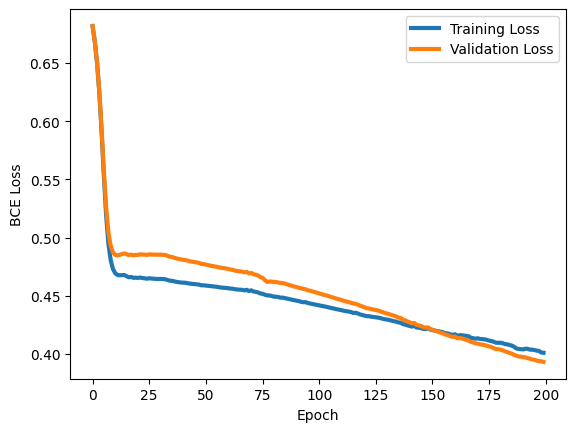

In [51]:
# 損失率
plt.plot(training_losses, linewidth=3)
plt.plot(val_losses, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

In [52]:
# 準確率

accuracy_score(test_y, y_pred)

0.799492385786802

# Kera

In [53]:
!pip install --upgrade pip
!pip uninstall tensorflow tensorflow-addons keras -y
!pip install tensorflow tensorflow-addons


# uninstall

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: tensorflow-addons 0.23.0
Uninstalling tensorflow-addons-0.23.0:
  Successfully uninstalled tensorflow-addons-0.23.0
Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (611 kB)
Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
Using 

In [54]:
!pip install keras==2.15.0

  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


In [55]:
!pip install tensorflow==2.12
!pip install tensorflow-addons==0.23.0
!pip install typeguard==2.13.3

  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not 

In [56]:
import tensorflow_addons as tfa
print(tfa.__version__)

0.23.0


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

In [57]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    layers.Dense(64, name="hidden1", activation="relu"),
    layers.Dense(32, name="hidden2", activation="relu"),
    layers.Dense(1, name="output", activation=tf.nn.sigmoid),
])
optimizer = keras.optimizers.SGD(lr=0.05)
model.compile(optimizer=optimizer, loss=tfa.losses.SigmoidFocalCrossEntropy(), metrics=["Accuracy"])
model.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=200, batch_size=32)

Epoch 1/200
45/45 [==============================] - 2s 12ms/step - loss: 0.0683 - Accuracy: 0.5021 - val_loss: 0.0636 - val_Accuracy: 0.4937
Epoch 2/200
45/45 [==============================] - 0s 5ms/step - loss: 0.0603 - Accuracy: 0.5078 - val_loss: 0.0582 - val_Accuracy: 0.5633
Epoch 3/200
45/45 [==============================] - 0s 6ms/step - loss: 0.0555 - Accuracy: 0.5925 - val_loss: 0.0543 - val_Accuracy: 0.5949
Epoch 4/200
45/45 [==============================] - 0s 5ms/step - loss: 0.0523 - Accuracy: 0.6674 - val_loss: 0.0526 - val_Accuracy: 0.7468
Epoch 5/200
45/45 [==============================] - 0s 5ms/step - loss: 0.0502 - Accuracy: 0.7203 - val_loss: 0.0517 - val_Accuracy: 0.7722
Epoch 6/200
45/45 [==============================] - 0s 5ms/step - loss: 0.0495 - Accuracy: 0.7444 - val_loss: 0.0512 - val_Accuracy: 0.7785
Epoch 7/200
45/45 [==============================] - 0s 4ms/step - loss: 0.0494 - Accuracy: 0.7458 - val_loss: 0.0514 - val_Accuracy: 0.7911
Epoch 8/200


In [58]:
y_pred = model.predict(test_X)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(test_y, y_pred))

13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       203
           1       0.84      0.72      0.78       191

    accuracy                           0.80       394
   macro avg       0.80      0.79      0.80       394
weighted avg       0.80      0.80      0.80       394



In [59]:
X_test_with_predictions_pytorch = test_X.copy()
X_test_with_predictions_pytorch['quality'] = test_y.values  # 添加原始的 quality 欄位
X_test_with_predictions_pytorch['quality_pred_kera'] = y_pred  # 添加預測的 quality 欄位
X_test_with_predictions_pytorch

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality,quality_pred_kera
857,0.363014,0.020000,0.031802,0.360499,0.173653,0.307692,0,0
1480,0.138693,0.710631,0.081824,0.643945,0.275647,0.239408,1,1
56,0.260274,0.470000,0.236749,0.508811,0.143713,0.107692,0,0
1100,0.171233,0.430000,0.045936,0.398678,0.287425,0.430769,1,1
859,0.143836,0.460000,0.010601,0.455947,0.089820,0.307692,0,0
...,...,...,...,...,...,...,...,...
1401,0.162059,0.321358,0.013543,0.204228,0.133362,0.673790,1,0
1234,0.128274,0.362817,0.031871,0.465044,0.448985,0.277223,1,1
332,0.136986,0.650000,0.144876,0.699706,0.167665,0.338462,0,0
1334,0.091159,0.470000,0.063604,0.557334,0.333478,0.382376,1,1


Epoch 1/200
45/45 [==============================] - 0s 8ms/step - loss: 0.0393 - Accuracy: 0.7917 - val_loss: 0.0407 - val_Accuracy: 0.8291
Epoch 2/200
45/45 [==============================] - 0s 4ms/step - loss: 0.0386 - Accuracy: 0.7938 - val_loss: 0.0387 - val_Accuracy: 0.7595
Epoch 3/200
45/45 [==============================] - 0s 4ms/step - loss: 0.0395 - Accuracy: 0.7917 - val_loss: 0.0388 - val_Accuracy: 0.7658
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 0.0386 - Accuracy: 0.7846 - val_loss: 0.0392 - val_Accuracy: 0.8165
Epoch 5/200
45/45 [==============================] - 0s 4ms/step - loss: 0.0390 - Accuracy: 0.7825 - val_loss: 0.0391 - val_Accuracy: 0.7658
Epoch 6/200
45/45 [==============================] - 0s 5ms/step - loss: 0.0389 - Accuracy: 0.7860 - val_loss: 0.0384 - val_Accuracy: 0.7595
Epoch 7/200
45/45 [==============================] - 0s 4ms/step - loss: 0.0385 - Accuracy: 0.7888 - val_loss: 0.0406 - val_Accuracy: 0.8354
Epoch 8/200
4

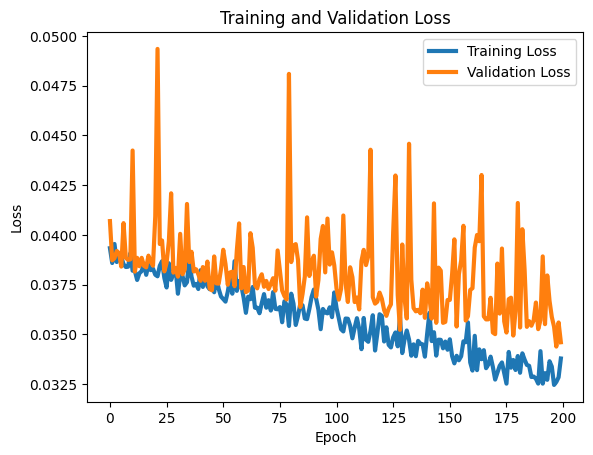

In [61]:
# 損失率

history = model.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=200, batch_size=32)


train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 绘制损失率
plt.plot(train_loss, linewidth=3, label='Training Loss')
plt.plot(val_loss, linewidth=3, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [63]:
accuracy = accuracy_score(test_y, y_pred)
accuracy

0.7969543147208121